**Pokémon** é um ícone global para crianças e adultos em todos os lugares. É uma série de TV que se expandiu para videogames, jogos de cartas, filmes, mercadorias e tudo mais.

Neste notebook iremos realizar uma analise em cima de dados de pokemons (dados de atributos e batalhas)


Os datasets:

1. Pokemon.csv: Contem dados de Pokemons que podem ser identificados pela id da pokedex

2. Combats.csv: Dados de batalhas de Pokemons, contendo id's dos combatentes e o vencedor.

# Análise exploratória de dados
Começamos importando as bibliotecas e arquivos, dando uma olhada no que estamos usando.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 

import seaborn as sns 
import random 

random.seed(1)

pokemon = pd.read_csv("pokemon.csv")

# Renomeando a coluna com Numero
pokemon = pokemon.rename(index=str, columns={"#": "Number"})
combat = pd.read_csv("combats.csv")
pokemon.head()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [ ]:
print("Dimensões do Pokemon: " + str(pokemon.shape))
print("Dimensões de Combate: " + str(combat.shape))

Dimensões do Pokemon: (800, 12)
Dimensões de Combate: (50000, 3)


## Valores ausentes

In [ ]:
pokemon.isnull().sum()

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64


**Vamos começar encontrando o pokémon perdido!**

In [ ]:
print("Este pokémon é o antes do pokémon desaparecido: " + pokemon['Name'][61])
print(pokemon[pokemon['Name'].isnull()])
print("Este pokémon é o depois do pokémon desaparecido: " + pokemon['Name'][63])

Este pokémon é o antes do pokémon desaparecido: Mankey
    Number Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62      63  NaN  Fighting    NaN  65     105       60       60       70   

    Speed  Generation  Legendary  
62     95           1      False  
Este pokémon é o depois do pokémon desaparecido: Growlithe


Supondo que os índices sigam a mesma ordem de numeração que o National Pokedex Number, podemos procurar o Pokémon ausente se encontra entre os dois. **Primeape** é o Pokémon desaparecido.

In [ ]:
pokemon['Name'][62] = "Primeape"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<img src="https://thenexus.one/storage/2022/07/Pokemon-GO-Primeape-Raid-Counters.jpg" alt="alt text" title="image Title" />

A partir do conjunto de dados de combates, calcularemos a porcentagem de vitórias de cada pokemon. Espero que isso possa nos ajudar a saber mais sobre qual pokemon vence. Então vamos ir mais a fundo para tentar determinar quais estatísticas contribuem mais para a vitória ou qual tipo de pokémon ganha mais vezes. Em seguida, observamos a forma dos quadros de dados e encontramos uma anomalia muito interessante.

In [ ]:
# calcula a porcentagem de vitórias de cada pokémon
# adiciona o cálculo ao conjunto de dados do pokemon
total_Wins = combat.Winner.value_counts()
# obtém o número de vitórias para cada pokemon
numberOfWins = combat.groupby('Winner').count()

# ambos os métodos produzem os mesmos resultados
countByFirst = combat.groupby('Second_pokemon').count()
countBySecond = combat.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


Podemos ver que o número de dimensões é diferente no total de vitórias. Isso significa que há um pokemon que não conseguiu vencer durante suas lutas. Vamos encontrar o pokemon que não ganhou uma única luta.

In [ ]:
find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1 
losing_pokemon = pokemon.iloc[find_losing_pokemon[0],]
print(losing_pokemon)

Number            231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


O pokemon é **Shuckle**, Parece que ele tem uma defesa muito forte, mas é muito fraco em todas as outras categorias.



<img src="https://staticg.sportskeeda.com/editor/2022/02/5a08b-16439377676020-1920.jpg" alt="alt text" title="image Title" />

O processo de criação da coluna 'Porcentagem de ganhos' é conhecido como **engenharia de recursos**. É o processo de usar dados fornecidos e combiná-los em combinação para criar novas variáveis ​​(ou recursos) a serem usados ​​na análise e é uma parte importante do aprendizado de máquina. Abaixo, desenvolvemos o novo recurso, adicionamos ao nosso conjunto de dados e mesclamos os dois conjuntos de dados. A partir daí, notamos que existem alguns pokémons que não possuem nenhuma batalha gravada.


In [ ]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

# merge no conjunto de dados vencedor e o conjunto de dados original do pokemon
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
results3 = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')

# Podemos observar a diferença entre os dois conjuntos de dados para ver qual pokemon nunca participou de uma luta

# subset do dataframe onde a porcentagem de vitórias do pokémon é NaN
results3[results3['Win Percentage'].isnull()]


,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,NaN,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN,NaN


Houve alguns Pokémon que não lutaram.

## Encontrando os 10 melhores Pokémon com a pior porcentagem de vitórias

In [ ]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,3.0,3.0,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,3.0,3.0,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,4.0,4.0,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,4.0,4.0,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,5.0,5.0,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,5.0,5.0,115.0,0.043478
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,6.0,6.0,130.0,0.046154
209,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,6.0,6.0,125.0,0.048000
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,7.0,7.0,133.0,0.052632
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False,8.0,8.0,133.0,0.060150


## Encontrando os 10 melhores Pokémon com a melhor porcentagem de vitórias

In [ ]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False ).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,127.0,127.0,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,116.0,116.0,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,121.0,121.0,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,115.0,115.0,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,124.0,124.0,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,122.0,122.0,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,118.0,118.0,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,119.0,119.0,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,114.0,114.0,120.0,0.950000


Há uma clara diferença entre Poekmon que ganha e perde. 
Mega Aerodactyl é o que tem a maior porcentagem de de vitórias, isso se da por conta da otima combinação de atributos, por ser de tipo pedra/voador e por ser uma mega evolução



Nas imagens a baixo podemos ver a diferença de ambos

<img src="https://1.bp.blogspot.com/-4ay30Vn_2Xc/Xx8i0BWQaaI/AAAAAAACahQ/k4NyISwxMPEseiRbKzeiJC0-30Te_S7OQCLcBGAsYHQ/s512/poke_capture_0142_001_mf_n_00000000_f_n.png" alt="alt text" title="image Title" />
<img src="https://static.wikia.nocookie.net/pokepediabr/images/e/e8/142Aerodactyl.png/revision/latest?cb=20161215014108&path-prefix=pt-br" alt="alt text" title="image Title" />

## Estatísticas básicas dos dados

In [ ]:
results3.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,63.856960,63.856960,127.541507,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,32.925941,32.925941,11.397402,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,3.000000,3.000000,92.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,36.000000,36.000000,120.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,62.000000,62.000000,128.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,91.000000,91.000000,135.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,152.000000,152.000000,164.000000,0.984496


A tabela acima mostra as estatísticas básicas de cada variável como a média, min, max, etc. A razão pela qual isso é útil, é que dá uma melhor compreensão do intervalo de valores com os quais estamos trabalhando e a média desses valores. 

## Visualizando os dados


Text(0.5, 1.0, 'Total Pokemon by Type 1')

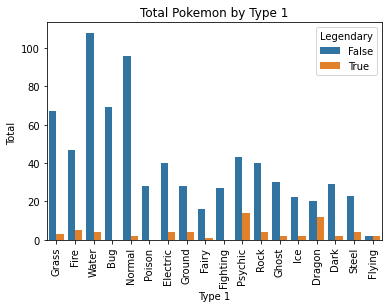

In [ ]:
import matplotlib.pyplot as plt
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results3)

plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

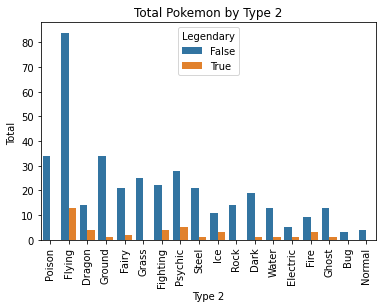

In [ ]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=results3)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

Podemos ver que água, normal, inseto e grama são os tipos 1 mais comuns e voadores, terra e veneno são os tipos 2 mais comuns), o que não me diz é quais atributos são mais aparentes. Como isso pode ser útil é possivelmente prever a probabilidade de lutar contra um tipo específico de pokemon e ter um tipo de contador para ele. Por exemplo, um pokémon do tipo água. Como sabemos que os pokémons aquáticos são fracos contra grama ou elétricos, pode ser uma boa ideia manter um desses tipos em nosso esquadrão de batalha.

Vamos agregar nossa porcentagem de vitórias por tipo 1.

In [ ]:
results3.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
Type 1,
Fairy,0.329300
Rock,0.404852
Steel,0.424529
Poison,0.433262
Bug,0.439006
Ice,0.439604
Grass,0.440364
Water,0.469357
Fighting,0.475616


## Tabela de correlação



In [ ]:
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
results3.loc[:,col].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.258006
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.500181
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.129426
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.478940
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.324218
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.937742
Win Percentage,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,1.000000


Text(0.5, 1.0, 'Speed vs Win Percentage')

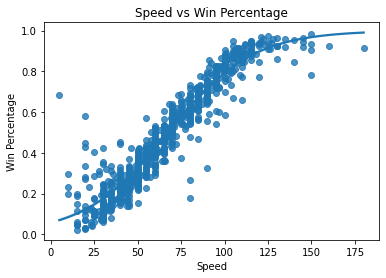

In [ ]:
import matplotlib.pyplot as plt

sns.regplot(x="Speed", y="Win Percentage", data=results3, logistic=True).set_title("Speed vs Win Percentage")

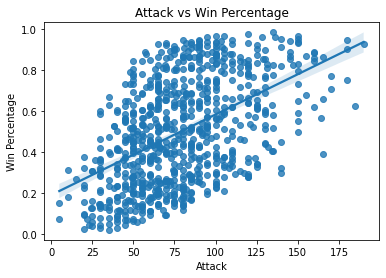

In [ ]:
ax = sns.regplot(x="Attack", y="Win Percentage", data=results3).set_title("Attack vs Win Percentage")

In [ ]:
dataset.head()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37,37,133,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46,46,121,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89,89,132,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70,70,125,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55,55,112,0.491071


## Processando dados

In [ ]:
dataset = results2

In [ ]:
# Removendo linhas com valores NA porque causará erros ao ajustar ao modelo
dataset.dropna(axis=0, how='any')

# Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste

# A primeira fatia é da coluna 5 até a coluna 11 (HP-Generation)
X = dataset.iloc[:, 5:11].values

# A segunda fatia é pego as informações da celula 15 (percentual de vitória)
y = dataset.iloc[:, 15].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Regressão linear

Agora com regressão linear iremos prever a probabilidade de um pokemon vencer a batalha.

In [ ]:
def ml_linearreg(X_train, X_test, y_train, y_test):

    # Ajustando a regressão linear múltipla ao conjunto de treinamento
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))
    
    # Prevendo os resultados do conjunto de testes
    y_pred = regressor.predict(X_test)

    # Validando os resultados
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    return mae

ml_linearreg(X_train, X_test, y_train, y_test)

0.907614232004021


0.06143408809230802